## Data Bootcamp:  Examples

Introductory examples for [Data Bootcamp](https://github.com/DaveBackus/Data_Bootcamp#data-bootcamp), a course at NYU's Stern School of Business. The course is designed to introduce students to **economic and financial data** and the **Python tools** to work with it effectively. The examples that follow illustrate popular sources of data and graphs that summarize it in what we hope are useful ways.  You'll get the idea from the text and figures. The code will show you what's involved.  It will be obscure if you're new to Python, but you will be able to do all of this and more by the end of the course. 

You should feel free to **ask questions** as we go through this -- about everything and anything.  You may not get it all, but it's good practice to start thinking about how the code works.  

Written by [Dave Backus](http://pages.stern.nyu.edu/~dbackus/), September 2015.

A product of the #nyuecon NYU Python Factory at NYU's [Stern School of Business](http://www.stern.nyu.edu/).

### The data mentality

The examples illustrate what we call the **data mentality**: the ability to use to learn something about the world.  We'll use it to describe the economic performance of countries, the risk involved in equity investments, and many other things.  In each case, think of yourself as an active participant in a process of ongoing exploration.  For each of the examples that follow, ask 
    
* Where does the data come from?    
* What did you learn from it?
* What else would you like to know?
* How would you improve the graphics?  

Also any other questions that cross your mind.  

### Working list (delete when done) 

* World GDP 
* US GDP growth (data from FRED)
* Chinese economic indicators (FRED) 
* US economic indicators (FRED) 
* US labor market conditions (Beveridge curve) (FRED) 
* Government debt (WEO) (Greece, US, Japan, ??) 
* GDP per capita in emerging market economies (World Bank) 
* Emerging market indicators (World Bank?) 
* Stock prices and returns (Yahoo?) 
* Demographics 
* Fama-French equity "factors" (data from Ken French's website)
* S&P 500 ETF (Spyders) (Yahoo finance) 




###  Preliminaries

In [1]:
# check Python version 
# anything after a hash (#) is a comment 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2015-09-16
What version of Python are we running? 
3.4.1 |Anaconda 2.3.0 (64-bit)| (default, Jun 11 2014, 17:27:11) [MSC v.1600 64 bit (AMD64)]


In [2]:
# This is an IPython command: it says to put plots here in the notebook.
%matplotlib inline

---
### Example 1:  Comparing countries by GDP and GDP per capita

**GDP** is the total value of output produced in a country.  **GDP per capita** is the per person version -- GDP divided by the population.  Both are expressed here in 2011 US dollars with an adjustment for the cost of living.  They come from the World Bank's *World Development Indicators*, a great source of information about economic and social conditions around the world.  See the World Bank's [data catalog](http://datacatalog.worldbank.org/) for other things you can find here.

See the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-wb) for more information about accessing World Bank data in Python. 

In [3]:
# load packages (redundancy is ok)
import pandas as pd                # data management tools 
from pandas.io import wb           # World Bank api 
import matplotlib.pyplot as plt    # plotting tools 

In [4]:
# look for codes for the variables we want
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
4704,GDPPCKD,"GDP per Capita, constant US$, millions"
6805,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
6807,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
6809,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [5]:
# read data from World Bank  
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD']          # variable list 
iso  = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']  # country list (ISO codes)
year = 2014 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data 
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp']          # rename variables 
df['gdp'] = df['gdp']/10**12           # convert to trillions
df['gdppc'] = df['gdppc']/10**3        # convert to thousands 
df['order'] = [5, 3, 1, 4, 2, 6, 0]    # reorder countries 
df = df.sort(columns='order', ascending=False)

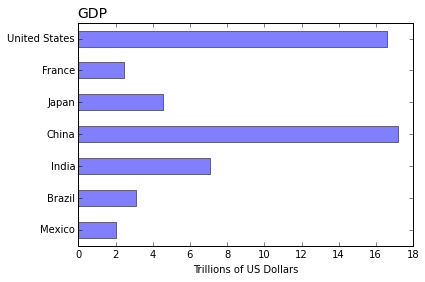

In [6]:
# GDP bar chart 
ax = df['gdp'].plot(kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

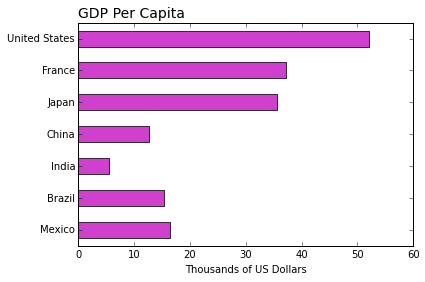

In [7]:
# ditto for GDP per capita (per person)
ax = df['gdppc'].plot(kind='barh', color='m', alpha=0.5) 
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

**Questions**

* Where does the data come from?    
* What did you learn from it?
* What else would you like to know?
* How would you improve the graphics?  

---
## Example 2:  US economic conditions

**A. GDP.** Employment, asset returns, and many other things are tied to the state of the economy.  The bottom line number here is Gross Domestic Product or GDP, a measure of total production for a given economy.  We look here at US GDP, specifically its level and its growth rate.  

The data come from the St Louis Fed's [FRED database](https://research.stlouisfed.org/fred2/) (Federal Reserve Economic Data), one of the best and most user-friendly sources of macroeconomic data.  The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-fred) has more about accessing FRED data in Python. 

In [8]:
# get data from FRED
import pandas.io.data as web           # web interface with FRED
import datetime as dt                  # handles dates 
import matplotlib.pyplot as plt        # plotting 

fred_series = ["GDPC1"]                                       # the real GDP code for FRED
start_date = dt.datetime(1960, 1, 1)
fred = web.DataReader(fred_series, "fred", start_date)/10**3  # convert to trillions of USD 
# print last 3 data points to see what we've got (quarterly data)
print(fred.tail(3))  

              GDPC1
DATE               
2014-10-01  16.1514
2015-01-01  16.1773
2015-04-01  16.3243


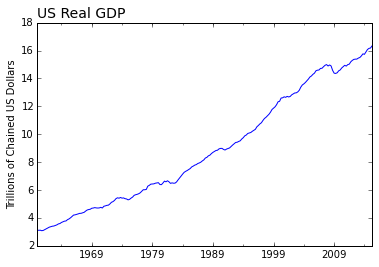

In [9]:
# plot 
ax = fred.plot(legend=False)
ax.set_title('US Real GDP', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Trillions of Chained US Dollars')
ax.legend().set_visible(False)

In [10]:
# compute quarterly growth rates 
g = 400*fred.pct_change()           # 400 makes this an annual percentage  
print(g.tail(3))
# change label   
g.columns = ['US GDP Growth']
gbar = g.mean()

               GDPC1
DATE                
2014-10-01  2.056159
2015-01-01  0.641430
2015-04-01  3.634723


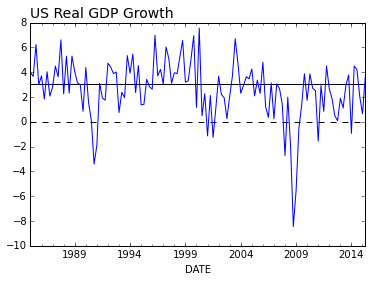

In [11]:
# plot starting in 1970 
start = dt.datetime(1985, 1, 1)
end = g.index[-1]
ax = g[g.index >= start].plot(kind='line')
ax.set_title('US Real GDP Growth', fontsize=14, loc='left')
ax.hlines(y=gbar, xmin=start, xmax=end)
ax.hlines(y=0, xmin=start, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

**B. Economic indicators.** There's a lot more information about economic conditions than GDP -- any of the hundreds of indicators about the state of the economy would tell us more.  We'll look at several of the most popular:  

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  premits for new housing
* NAPM:  purchasing managers index 

The first object here is the FRED code.  All of these indicators are monthly, which gives us a quicker response to changes in economic conditions than the quarterly GDP numbers.  For more on all this, see Chapter 11 of our best-selling [Global Economy book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course).

In [12]:
# get data from FRED
import pandas.io.data as web           # web interface with FRED
import pandas as pd                    # data manipulation 
import numpy as np                     # ditto  
import datetime as dt                  # handles dates 
import matplotlib.pyplot as plt        # plotting 
import matplotlib as mpl

# list of indicators (FRED codes)
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'NAPM']
start_date = dt.datetime(1970, 1, 1)
inds = web.DataReader(indicators, "fred", start_date)
inds.tail(3)

,INDPRO,PAYEMS,AWHMAN,PERMIT,NAPM
DATE,,,,,
2015-06-01,106.5627,141870,41.8,1337,53.5
2015-07-01,107.4866,142115,41.8,1130,52.7
2015-08-01,107.0793,142288,41.8,NaN,51.1


We use growth rates of these indicators to assess the state of the economy.  That's a choice based on experience, not something that follows from some kind of infallibale logic.  We also standardize the variables so that they all vary around the same level (zero) and by about the same amount.  If we didn't do this, the difference in scales would get in the way.  

In [13]:
# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
g_std = (g - g.mean()) / g.std()

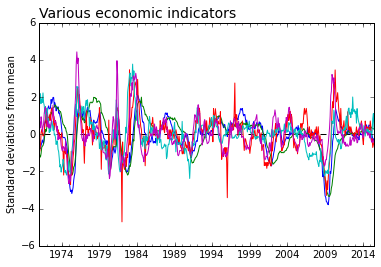

In [14]:
# plot 
ax = g_std.plot()
ax.set_title('Various economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

#### Questions and comments

* What would you do differently here?
* We turned off the legend because it got in the way.  We might want to reformat it so that it fits better.  We also used `pcolor` to generate a heatmap, but it wasn't all that compelling.  

---
### Example 3:  Emerging market indicators 

http://www.theguardian.com/commentisfree/datablog/2015/sep/10/africa-in-numbers-how-its-countries-compare

GDP per capita 
Literacy 
cell phone penetration
fertility 


### Example 4:  Population aging 

UN population data.  

Selected country codes:  World (900), Japan (392), China (156), Kenya (404), United States (840) 

Guide
http://www.statoids.com/wab.html

UN data 

http://esa.un.org/unpd/wpp/DVD/

http://esa.un.org/unpd/wpp/DVD/Files/1_Excel%20(Standard)/EXCEL_FILES/1_Population/WPP2015_POP_F15_1_ANNUAL_POPULATION_BY_AGE_BOTH_SEXES.XLS

http://esa.un.org/unpd/wpp/DVD/Files/1_Excel%20(Standard)/EXCEL_FILES/3_Mortality/WPP2015_MORT_F04_1_DEATHS_BY_AGE_BOTH_SEXES.XLS

http://esa.un.org/unpd/wpp/DVD/Files/1_Excel%20(Standard)/EXCEL_FILES/2_Fertility/WPP2015_FERT_F06_BIRTHS_BY_AGE_OF_MOTHER.XLS

In [37]:
%%time

urlbase = 'http://esa.un.org/unpd/wpp/DVD/Files/1_Excel%20(Standard)/EXCEL_FILES/1_Population/'
file = url = 'WPP2015_POP_F15_1_ANNUAL_POPULATION_BY_AGE_BOTH_SEXES.XLS'
unpop = pd.read_excel(urlbase+file, sheetname=0, skiprows=16, na_values=['…', ''])
#prj = pd.read_excel(urlbase+file, sheetname=1, skiprows=16, na_values=['…', ''])

# drop meaningless columns, rename date 
unpop.rename(columns={'Major area, region, country or area *': 'Country', 
                      'Reference date (as of 1 July)': 'Year', 
                      'Country code': 'Code'}, inplace=True) 

Wall time: 33 s


In [44]:
# select country and pivot 
code = 392 
df = unpop[unpop['Code']==code]
df.head()

,Index,Variant,Country,Notes,Code,Year,0-4,5-9,10-14,15-19,...,60-64,65-69,70-74,75-79,80+,80-84,85-89,90-94,95-99,100+
5346,5347,Estimates,Japan,NaN,392,1950,10997.606,9448.307,8634.342,8484.002,...,2277.718,1757.865,1271.333,674.869,362.356,NaN,NaN,NaN,NaN,NaN
5347,5348,Estimates,Japan,NaN,392,1951,10959.292,9729.976,8732.872,8531.276,...,2310.449,1790.233,1299.718,722.096,402.152,NaN,NaN,NaN,NaN,NaN
5348,5349,Estimates,Japan,NaN,392,1952,10540.207,10087.123,8876.318,8554.745,...,2345.182,1832.098,1321.373,770.497,437.195,NaN,NaN,NaN,NaN,NaN
5349,5350,Estimates,Japan,NaN,392,1953,10070.640,10461.555,9026.198,8546.760,...,2379.205,1873.304,1338.140,813.256,465.459,NaN,NaN,NaN,NaN,NaN
5350,5351,Estimates,Japan,NaN,392,1954,9628.542,10779.980,9196.952,8539.834,...,2420.676,1909.742,1356.797,845.667,487.439,NaN,NaN,NaN,NaN,NaN


In [45]:
df = df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1).set_index('Year')
df.ftypes

0-4      float64:dense
5-9      float64:dense
10-14    float64:dense
15-19    float64:dense
20-24    float64:dense
25-29    float64:dense
30-34    float64:dense
35-39    float64:dense
40-44    float64:dense
45-49    float64:dense
50-54    float64:dense
55-59    float64:dense
60-64    float64:dense
65-69    float64:dense
70-74    float64:dense
75-79    float64:dense
80+      float64:dense
80-84    float64:dense
85-89    float64:dense
90-94    float64:dense
95-99    float64:dense
100+     float64:dense
dtype: object

In [46]:
dft = df.T   #[['1955', '1985', '2015']]
dft.head()

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0-4,10997.606,10959.292,10540.207,10070.640,9628.542,9204.626,8498.656,8112.603,7927.885,7834.850,...,5556.339,5502.190,5465.819,5431.718,5393.341,5387.011,5366.545,5336.028,5302.418,5269.038
5-9,9448.307,9729.976,10087.123,10461.555,10779.980,10947.970,10980.666,10759.298,10308.107,9739.832,...,5866.667,5829.899,5764.886,5681.752,5598.905,5543.294,5496.592,5460.158,5430.099,5398.973
10-14,8634.342,8732.872,8876.318,9026.198,9196.952,9426.911,9744.566,10109.400,10495.630,10802.587,...,5969.750,5948.310,5946.637,5947.598,5928.416,5892.063,5831.872,5754.122,5673.802,5603.638
15-19,8484.002,8531.276,8554.745,8546.760,8539.834,8565.922,8624.520,8684.907,8785.508,8962.585,...,6477.634,6373.509,6260.301,6148.254,6055.624,6004.345,5990.113,5995.097,5991.002,5960.784
20-24,7636.338,7871.793,8074.720,8213.389,8291.049,8327.713,8367.135,8341.112,8287.082,8249.209,...,7349.290,7167.159,7018.167,6900.528,6795.214,6659.583,6504.307,6345.609,6209.632,6111.768


In [53]:
vars = df.columns.tolist()
print(vars[3], type(vars[3]))
obs = df.index.tolist()
print(obs[3], type(obs[3]))

15-19 <class 'str'>
1953 <class 'numpy.int64'>


In [56]:
df.index.is_object()
obs = df.index.tolist()
print(obs[3], type(obs[3]))  # *****

1953 <class 'numpy.int64'>


In [ ]:
import time
nap = 2
time.sleep(nap)           # pause execution 

### Example 5: Fama-French equity "factors"

Gene Fama and Ken French are two of the leading academics studying (primarily) equity returns.  Some of this work is summarized in the [press release](http://www.nobelprize.org/nobel_prizes/economic-sciences/laureates/2013/press.html) and related material for the 2013 Nobel Prize in economics, which was shared by Fama with Lars Hansen and Robert Shiller.  For now, it's enough to say that Ken French posts an extensive collection of equity data on his website.  

We'll look at what have come to be called the Fama-French factors.  The data includes:

* xsm:  the return on the market (aggregate equity) minus the riskfree rate
* smb (small minus big):  the return on small firms minus the return on big firms 
* hml (high minus low):  the return on firms with high book-to-market ratios minus those with low ratios. 
* rf:  the riskfree rate.

We download all of these at once, monthly from 1926.  Each is reported as a percentage.
Since they're monthly, you can get a rough annual number if you multiply by 12. 

**Question(s).** 
The question we address is how the returns compare:  their means, their variability, and so on.  
[Ask yourself:  how would I answer this?  What would I like to do with the data?]

References

* http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
* http://quant-econ.net/pandas.html
* http://pandas.pydata.org/pandas-docs/dev/remote_data.html#fama-french
* http://pandas.pydata.org/pandas-docs/stable/10min.html#selection 
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot
* http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.hist.html 

---

In [ ]:
# load packages (if it's redundant it'll be ignored)
import pandas.io.data as web      

# read data from Ken French's website 
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench')[0] 
# NB:  ff.xs is a conflict, rename to xsm  
ff.columns = ['xsm', 'smb', 'hml', 'rf']

# see what we've got
print(ff.head(3))
print(ff.describe())

In [ ]:
# compute and print summary stats 
moments = [ff.mean(), ff.std(), ff.skew(), ff.kurtosis() - 3]

# \n here is a line break
print('Summary stats for Fama-French factors (mean, std, skew, ex kurt)') #, end='\n\n') 
print(moments)
#[print(moment, end='\n\n') for moment in moments]

In [ ]:
# try some things yourself 
# like what?  type ff.[tab]
import pandas as pd
pd.__version__


In [ ]:
# some plots 
ff.plot()
plt.show()

ff.hist(bins=50, sharex=True)
plt.show()

ff.boxplot(whis=0, return_type='axes')
plt.show()

**Answer(s)?**  Aren't the boxplots in the last figure cool?  The histograms above them?  What do you see in them?  How do the various returns compare?   

In [ ]:
# Note:  size of circles based on population 

---

### Example 4: Option prices

A financial option gives its owner the right to buy or sell an asset (the "underlying") at a preset price (the "strike") by a specific date (the "expiration date").  Puts are options to sell, calls are options to buy.  We explore option prices with Yahoo Finance, specifically options on the S&P 500 exchange-traded fund, ticker SPY.  

We illustrate its usefulness with a scatterplot of life expectancy v GDP per capita.  

**Question(s).**  How do put and call prices vary with their strike price?  [Think about this.  What would you expect?] 

**Warning.** This won't work in Python 2.7 or, in fact, in any environment that uses versions of Pandas prior to 0.14.1.  The Yahoo Option API is labeled experimental and it seems the earlier versions don't allow easy access to the strike prices.  

**References**

* http://finance.yahoo.com/q/op?s=SPY+Options
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance-options

---

In [ ]:
# load packages 
import pandas as pd 
import pandas.io.data as web
from pandas.io.data import Options
import datetime as dt 
import matplotlib.pylab as plt

# ticker 
ticker = 'spy' 

In [ ]:
# load stock price first (the underlying) 
# pick a recent date and subtract seven days to be sure we get a quote  
# http://pymotw.com/2/datetime/#date-arithmetic
today = dt.date.today()
one_week = dt.timedelta(days=7)
start = today - one_week
stock = web.DataReader(ticker, 'yahoo', start) 
print(stock)        # just to see what we have

# take the last close (-1 is the last, 'Close' is the close)
# this shows up in our figure 
atm = stock.ix[-1,'Close']      # the -1 takes the last observation   

In [ ]:
# get option prices for same ticker 
option = Options(ticker, 'yahoo')
expiry = dt.date(2014, 11, 20)
data_calls = option.get_call_data(expiry=expiry).dropna()
data_puts  = option.get_put_data(expiry=expiry).dropna()

# check what we have 
print(data_calls.index) 
print(data_calls.tail())

In [ ]:
# compute mid of bid and ask and arrange series for plotting 
calls_bid = data_calls['Bid']
calls_ask = data_calls['Ask'] 

calls_strikes = data_calls['Strike']
calls_mid = (data_calls['Bid'] + data_calls['Ask'])/2
puts_strikes = data_puts['Strike']
puts_mid = (data_puts['Bid'] + data_puts['Ask'])/2

*Note to self.* 
In older versions of Pandas, prior to 0.14.1, the option input puts the strike in the index, not as a column of data.
The next two lines check the versions of pandas and python on the off chance we want to check:  print(pd.__version__), 
! python --version 

In [ ]:
# plot call and put prices v strike 
plt.plot(calls_strikes, calls_mid, 'r', lw=2, label='calls')
plt.plot(puts_strikes, puts_mid, 'b', lw=2, label='puts')

# prettify it 
#plt.axis([120, 250, 0, 50])
plt.axvline(x=atm, color='k', linestyle='--', label='ATM')               
plt.legend(loc='best')
plt.show()

In [ ]:
# rerun the figure above with different color lines.  Or dashed lines for call and put prices.  
# or change the form of the vertical ATM line:  solid? another color?  
